<a href="https://colab.research.google.com/github/Saisathwika-08/STML/blob/main/PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Evaluation of K-Nearest Neighbors Classifier for Heart Disease Prediction: Performance Metrics and Confusion Matrix Analysis

Accuracy: 86.34%

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       100
           1       0.87      0.86      0.87       105

    accuracy                           0.86       205
   macro avg       0.86      0.86      0.86       205
weighted avg       0.86      0.86      0.86       205



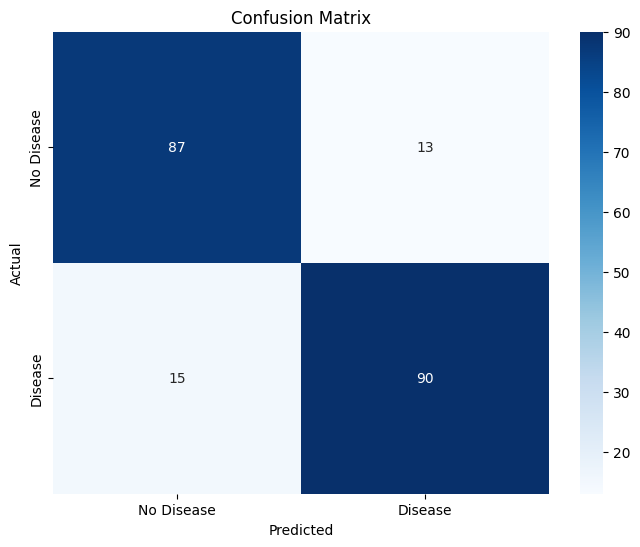

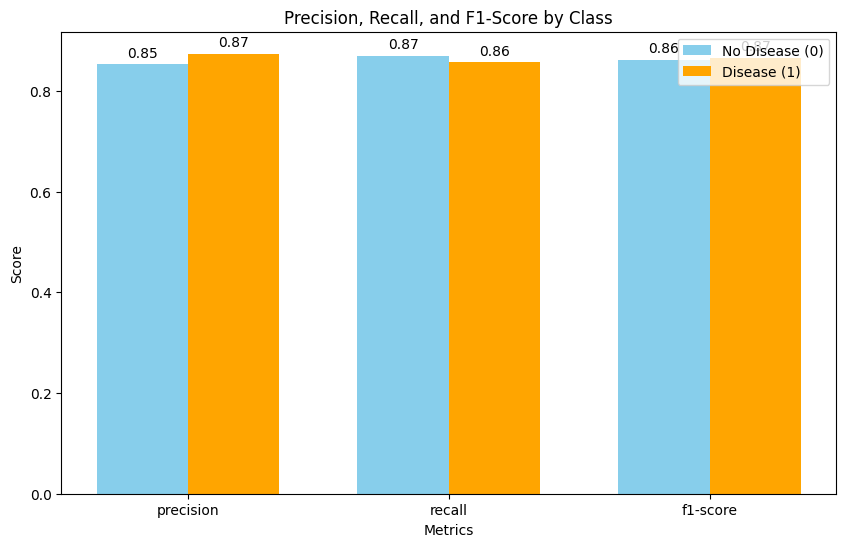

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
file_path = '/content/heart.csv'
data = pd.read_csv(file_path)
X = data.drop(columns=['target'])
y = data['target']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=["No Disease", "Disease"],
            yticklabels=["No Disease", "Disease"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
metrics = ['precision', 'recall', 'f1-score']
classes = ['No Disease (0)', 'Disease (1)']
class_metrics = [
    [report['0'][metric] for metric in metrics],
    [report['1'][metric] for metric in metrics]
]
x = np.arange(len(metrics))
width = 0.35
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, class_metrics[0], width, label=classes[0], color='skyblue')
bars2 = ax.bar(x + width/2, class_metrics[1], width, label=classes[1], color='orange')
ax.set_xlabel('Metrics')
ax.set_ylabel('Score')
ax.set_title('Precision, Recall, and F1-Score by Class')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')
plt.show()



In [ ]:
!pip install scikit-learn-extra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 37.9 MB/s eta 0:00:00


K-Medoids Clustering for Heart Disease Dataset: Evaluation and Visualization

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

Accuracy: 51.32%

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       499
           1       0.51      1.00      0.68       526

    accuracy                           0.51      1025
   macro avg       0.26      0.50      0.34      1025
weighted avg       0.26      0.51      0.35      1025



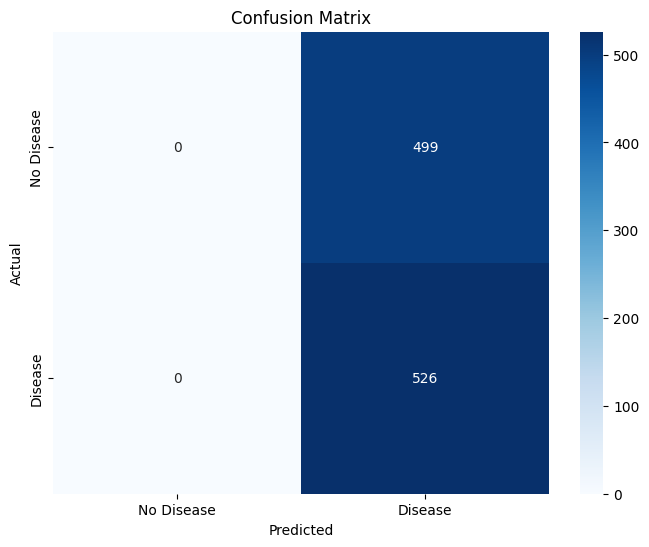

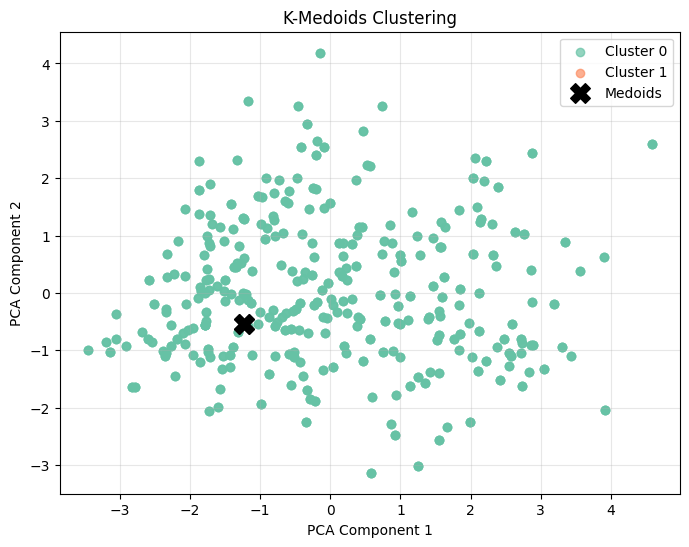

In [ ]:
import pandas as pd
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import mode
file_path = '/content/heart.csv'
data = pd.read_csv(file_path)
X = data.drop(columns=['target'])
y = data['target']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmedoids = KMedoids(n_clusters=2, random_state=42)
cluster_labels = kmedoids.fit_predict(X_scaled)
labels_mapped = np.zeros_like(cluster_labels)
for i in range(kmedoids.n_clusters):
    mask = (cluster_labels == i)
    labels_mapped[mask] = mode(y[mask])[0]
accuracy = accuracy_score(y, labels_mapped)
conf_matrix = confusion_matrix(y, labels_mapped)
report = classification_report(y, labels_mapped, output_dict=True)
print(f"Accuracy: {accuracy * 100:.2f}%\n")
print("Classification Report:")
print(classification_report(y, labels_mapped))
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=["No Disease", "Disease"],
            yticklabels=["No Disease", "Disease"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(8, 6))
palette = sns.color_palette("Set2", n_colors=2)
for cluster_label in np.unique(cluster_labels):
    plt.scatter(X_pca[cluster_labels == cluster_label, 0],
                X_pca[cluster_labels == cluster_label, 1],
                label=f'Cluster {cluster_label}', alpha=0.7, color=palette[cluster_label])
medoids_pca = pca.transform(kmedoids.cluster_centers_)
plt.scatter(medoids_pca[:, 0], medoids_pca[:, 1],
            marker='X', s=200, c='black', label='Medoids')

plt.title('K-Medoids Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


Random Forest Classifier for Heart Disease Prediction: Performance Evaluation and Feature Importance Analysis

Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



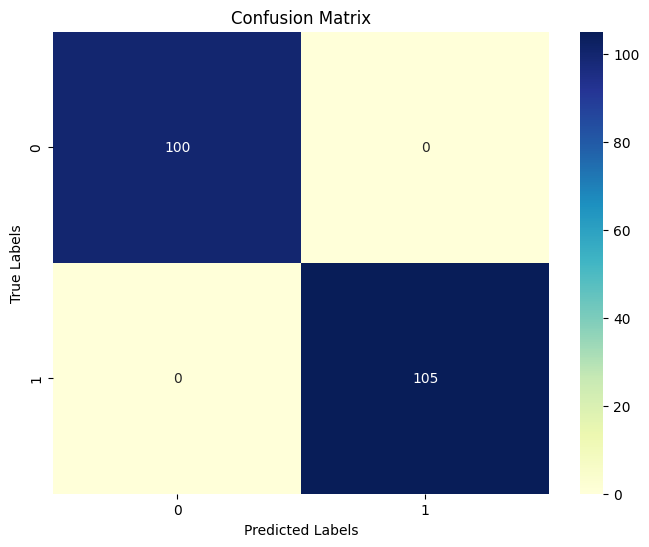

<ipython-input-6-5c9cbb933ce1>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette='viridis')


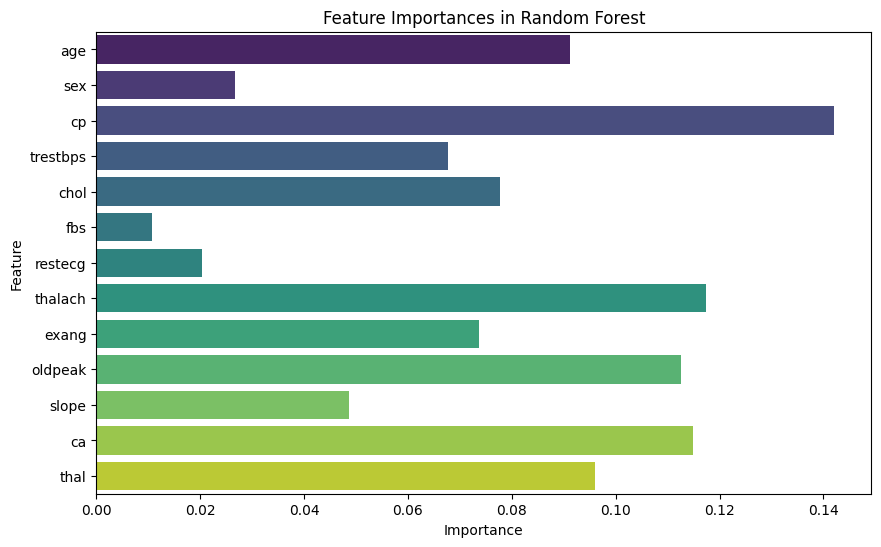

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
data = pd.read_csv('/content/heart.csv')
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", class_report)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", xticklabels=set(y), yticklabels=set(y))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
importances =  random_forest.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features, palette='viridis')
plt.title('Feature Importances in Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()



Decision Tree Classifier for Heart Disease Prediction: Visualization and Performance Analysis

Accuracy: 0.99

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       100
           1       1.00      0.97      0.99       105

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



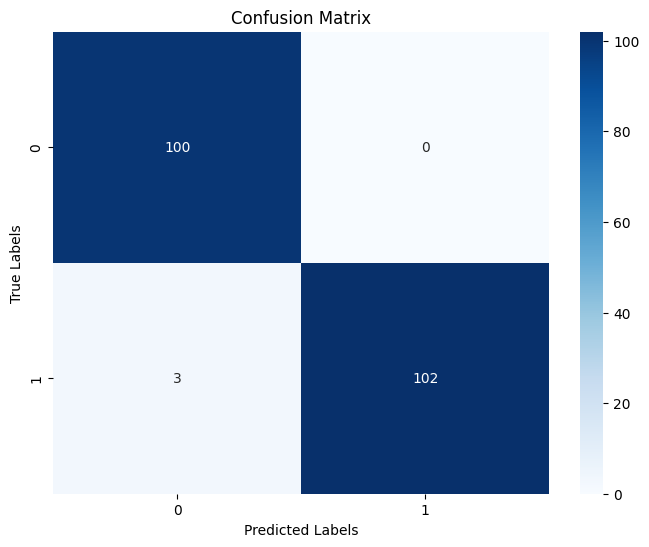

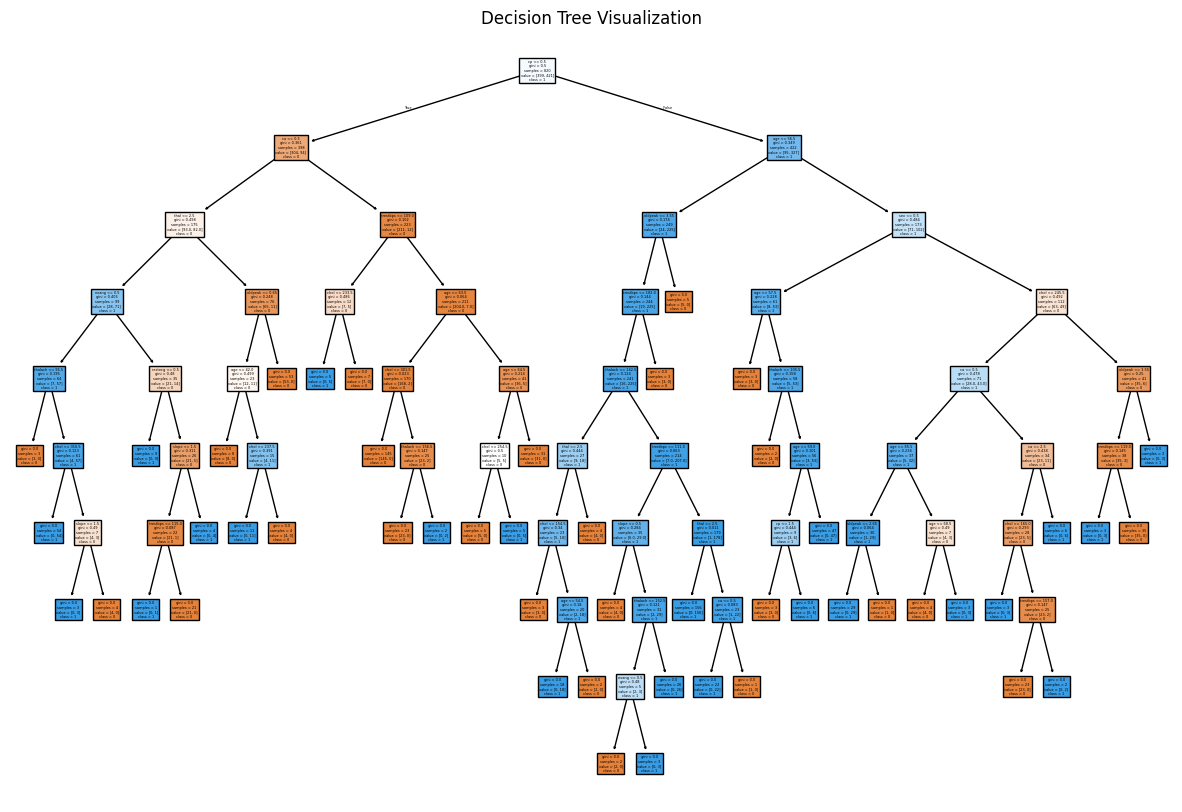

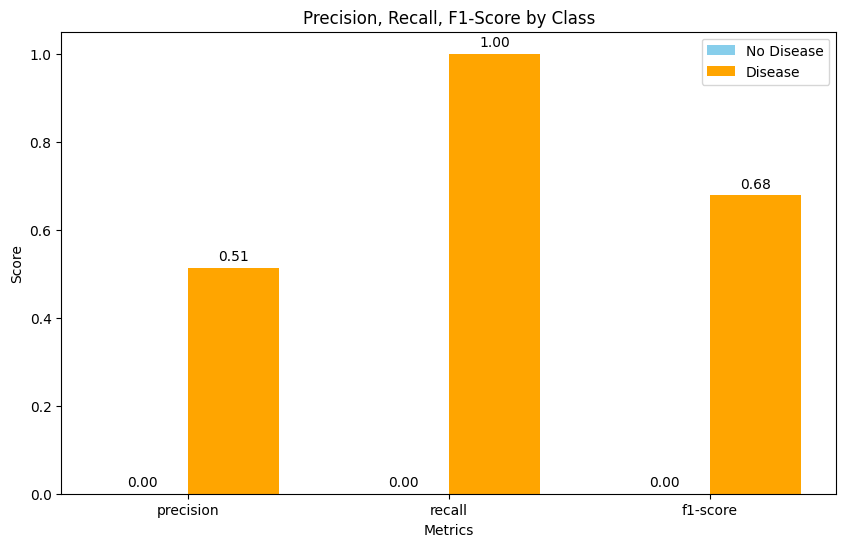

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('/content/heart.csv')
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", class_report)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=set(y), yticklabels=set(y))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
plt.figure(figsize=(15, 10))
plot_tree(decision_tree, feature_names=X.columns, class_names=[str(c) for c in set(y)], filled=True)
plt.title("Decision Tree Visualization")
plt.show()
metrics = ['precision', 'recall', 'f1-score']
classes = ["No Disease", "Disease"]
class_metrics = [
    [report['0'][metric] for metric in metrics],
    [report['1'][metric] for metric in metrics]
]
x = np.arange(len(metrics))
width = 0.35
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width / 2, class_metrics[0], width, label=classes[0], color='skyblue')
bars2 = ax.bar(x + width / 2, class_metrics[1], width, label=classes[1], color='orange')
ax.set_xlabel('Metrics')
ax.set_ylabel('Score')
ax.set_title('Precision, Recall, F1-Score by Class')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.show()

Support Vector Machine (SVM) for Heart Disease Prediction: Performance Metrics and Analysis

Accuracy: 0.80

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.71      0.78       102
           1       0.76      0.90      0.82       103

    accuracy                           0.80       205
   macro avg       0.82      0.80      0.80       205
weighted avg       0.82      0.80      0.80       205



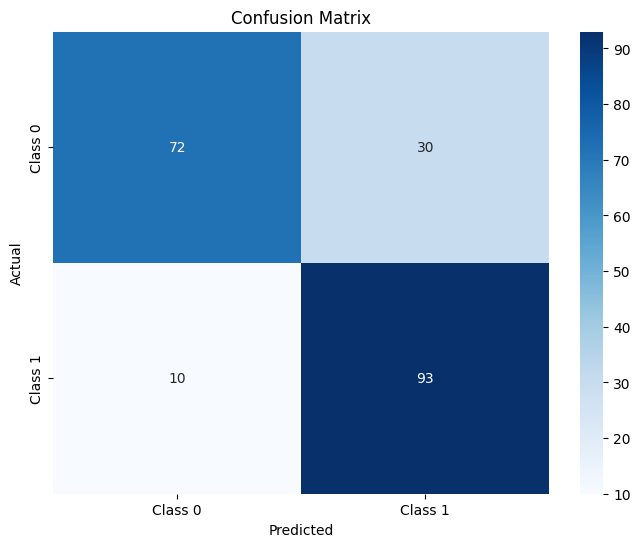

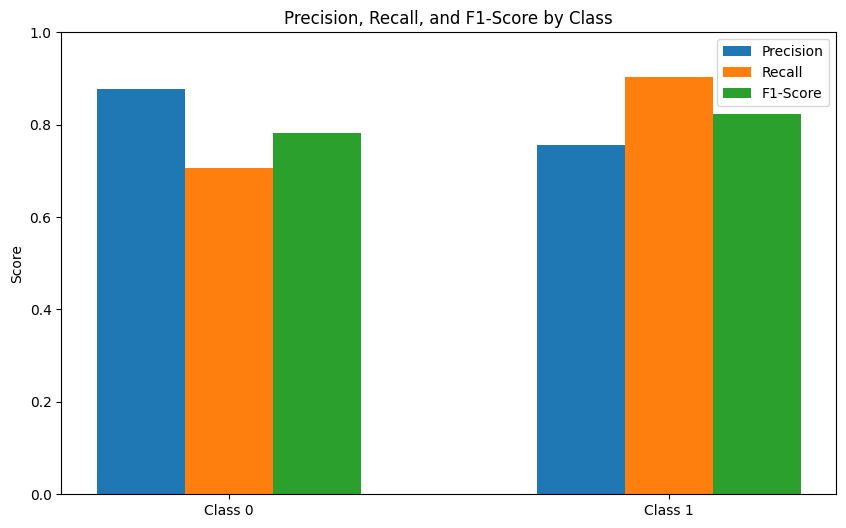

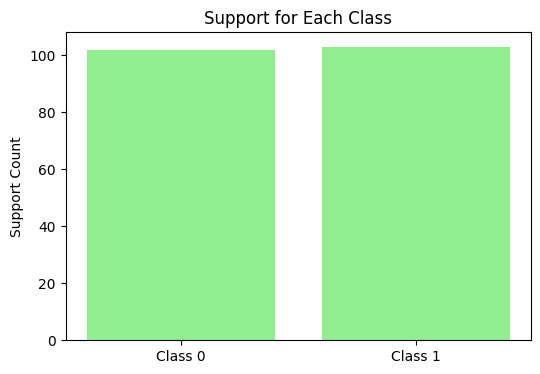

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
file_path = '/content/heart.csv'
data = pd.read_csv(file_path)
X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)
precision = [report['0']['precision'], report['1']['precision']]
recalls = [report['0']['recall'], report['1']['recall']]
f1_scores = [report['0']['f1-score'], report['1']['f1-score']]
supports = [report['0']['support'], report['1']['support']]
print(f"Accuracy: {accuracy:.2f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
metrics = ['Precision', 'Recall', 'F1-Score']
classes = ['Class 0', 'Class 1']
values = [precision, recalls, f1_scores]
plt.figure(figsize=(10, 6))
x = range(len(classes))
for i, metric in enumerate(metrics):
    plt.bar([p + i * 0.2 for p in x], values[i], width=0.2, label=metric)
plt.xticks([p + 0.2 for p in x], classes)
plt.ylim(0, 1)
plt.title('Precision, Recall, and F1-Score by Class')
plt.ylabel('Score')
plt.legend()
plt.show()
plt.figure(figsize=(6, 4))
plt.bar(classes, supports, color='lightgreen')
plt.title('Support for Each Class')
plt.ylabel('Support Count')
plt.show()


Confusion Matrix and Accuracy Analysis for Decision Tree Predictions

Accuracy: 99.71%


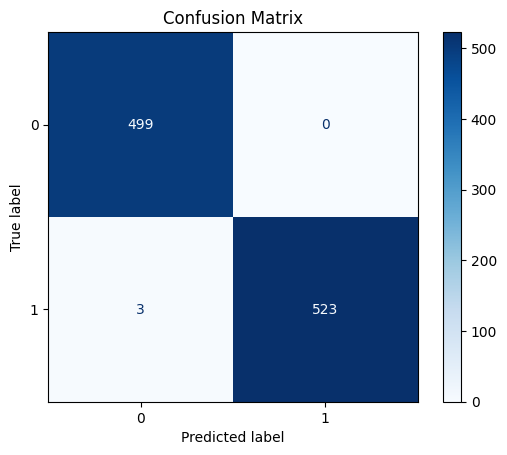

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
file_path = '/content/heart.csv'
data = pd.read_csv(file_path)
y_true = data['target']
y_pred =  decision_tree.predict(data.drop('target', axis=1))
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.2%}")
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data['target'].unique())
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [ ]:
!pip install scikit-learn-extra


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 13.5 MB/s eta 0:00:00


Model Performance Comparison: F1 Scores and Confusion Matrices Across Classification and Clustering Techniques

KNN F1 Score: 0.84
Random Forest F1 Score: 0.99
Decision Tree F1 Score: 0.99
SVM F1 Score: 0.83
K-Medoids F1 Score: 0.67


/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(


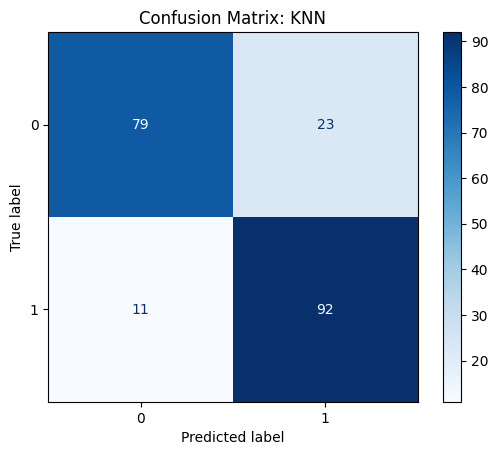

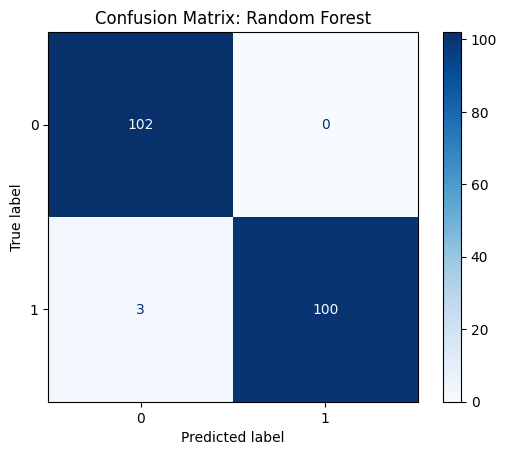

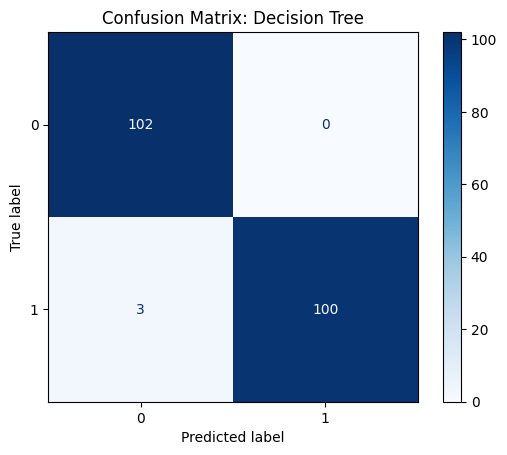

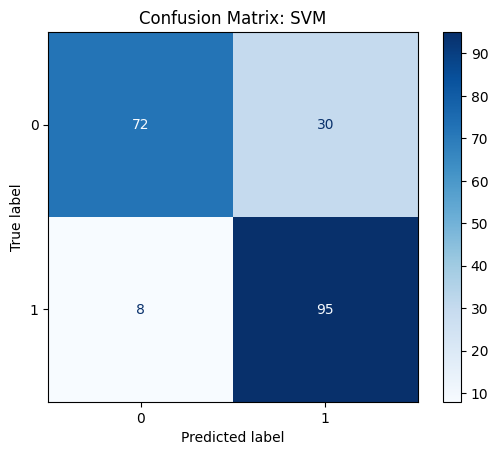

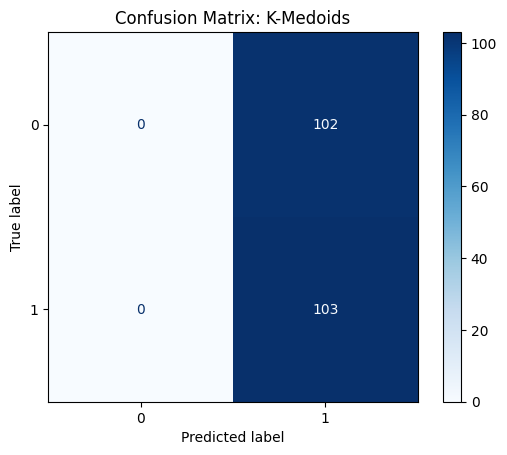


Summary of F1 Scores:
KNN: 0.84
Random Forest: 0.99
Decision Tree: 0.99
SVM: 0.83
K-Medoids: 0.67


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn_extra.cluster import KMedoids
from scipy.stats import mode
import matplotlib.pyplot as plt
import numpy as np
file_path = '/content/heart.csv'
data = pd.read_csv(file_path)
X = data.drop(columns=['target'])
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=5)
rf = RandomForestClassifier(random_state=42)
dt = DecisionTreeClassifier(random_state=42)
svm = SVC(kernel='linear', random_state=42)
models = {'KNN': knn, 'Random Forest': rf, 'Decision Tree': dt, 'SVM': svm}
f1_scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    f1_scores[name] = f1
    print(f"{name} F1 Score: {f1:.2f}")
kmedoids = KMedoids(n_clusters=len(np.unique(y)), random_state=42)
kmedoids.fit(X_train)
y_clusters = kmedoids.predict(X_test)
cluster_to_label = {}
for cluster in np.unique(y_clusters):
    mask = y_clusters == cluster
    mode_result = mode(y_test[mask])
    cluster_to_label[cluster] = mode_result.mode if isinstance(mode_result.mode, (np.ndarray, list)) else mode_result.mode
y_pred_kmedoids = np.array([cluster_to_label[cluster] for cluster in y_clusters])
y_pred_kmedoids = y_pred_kmedoids.astype(int)
y_pred_kmedoids = y_pred_kmedoids.flatten()
y_test = y_test.to_numpy()
y_test = y_test.flatten()
f1_kmedoids = f1_score(y_test, y_pred_kmedoids)
f1_scores['K-Medoids'] = f1_kmedoids
print(f"K-Medoids F1 Score: {f1_kmedoids:.2f}")
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix: {name}')
    plt.show()
cm_kmedoids = confusion_matrix(y_test, y_pred_kmedoids)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_kmedoids, display_labels=np.unique(y))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: K-Medoids')
plt.show()
print("\nSummary of F1 Scores:")
for name, f1 in f1_scores.items():
    print(f"{name}: {f1:.2f}")


In [ ]:
!pip install scikit-learn-extra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 17.0 MB/s eta 0:00:00


Comparative Analysis of Machine Learning Models for Heart Disease Prediction








/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


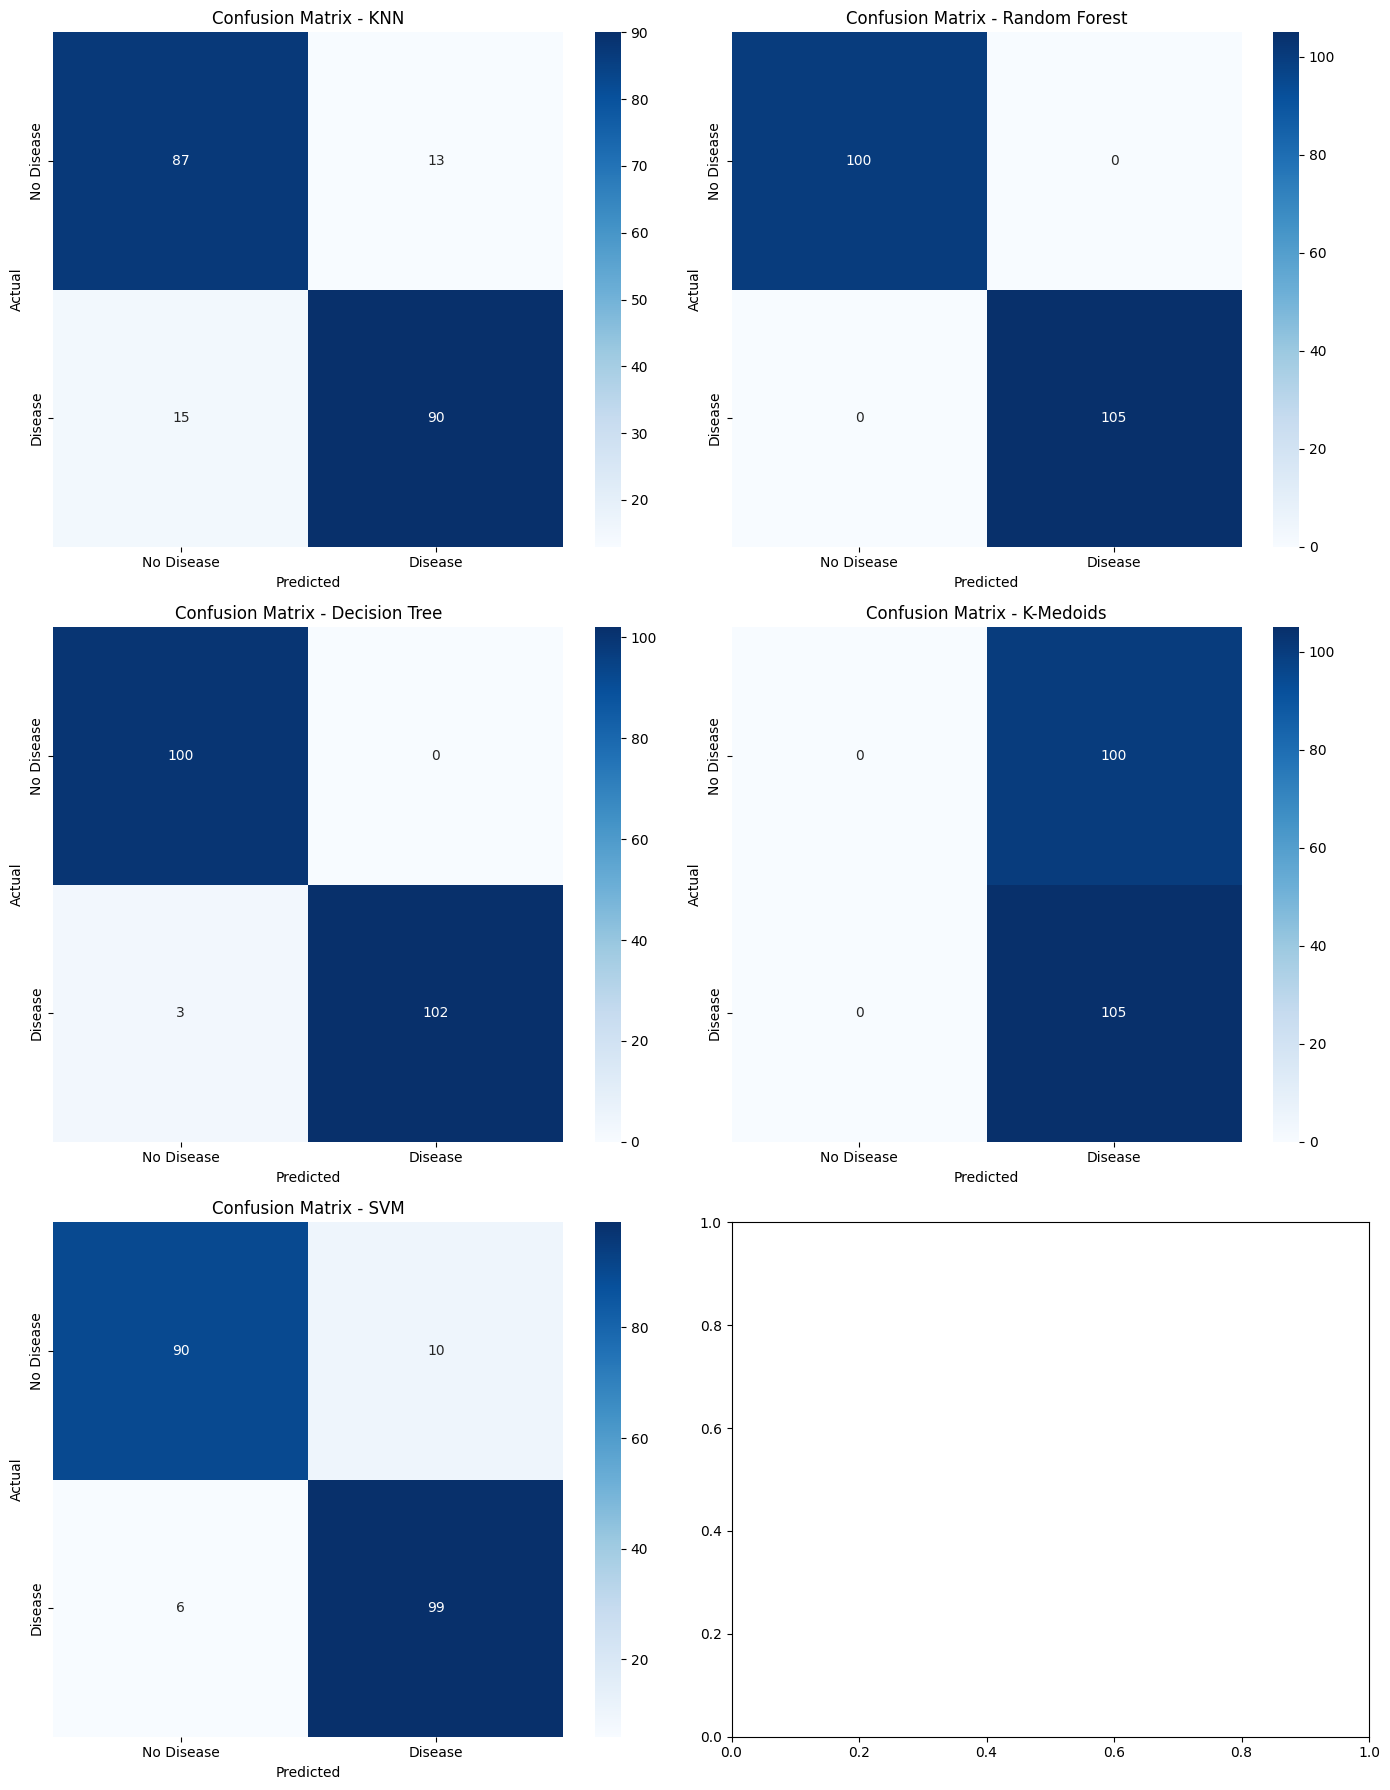

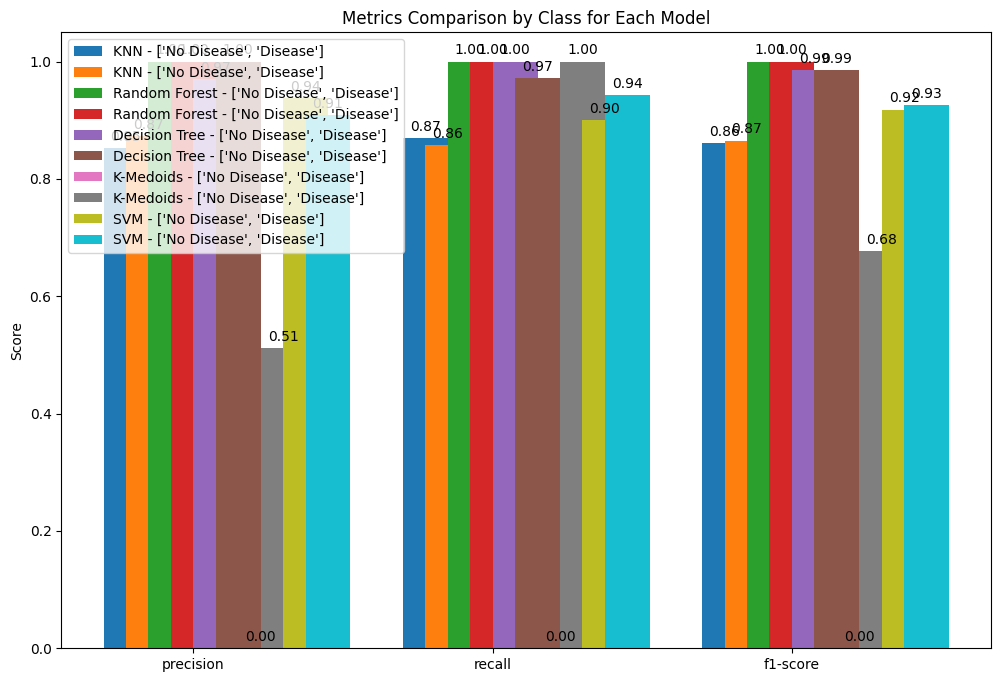

<ipython-input-20-029df59efcd0>:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rf_model.feature_importances_, y=X.columns, palette='viridis')


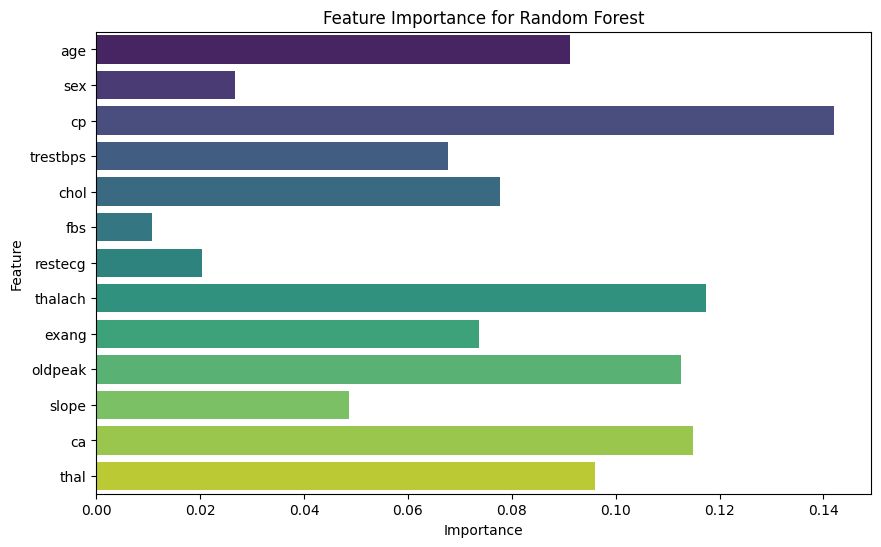

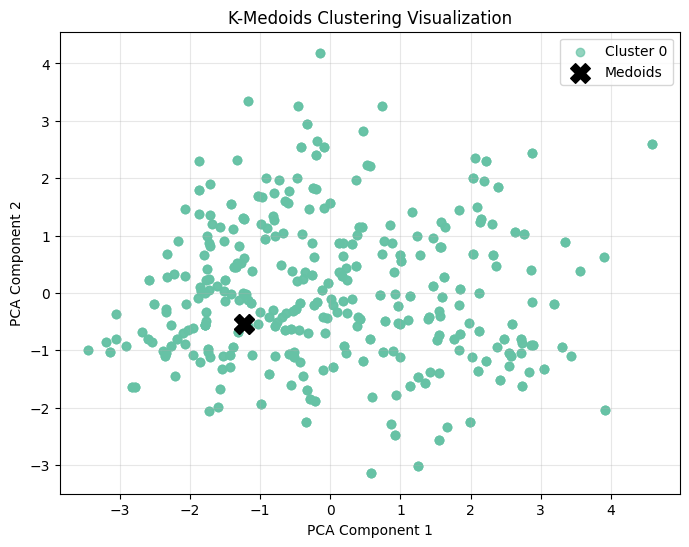

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn_extra.cluster import KMedoids
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from scipy.stats import mode
from sklearn.svm import SVC
file_path = '/content/heart.csv'
data = pd.read_csv(file_path)
X = data.drop(columns=['target'])
y = data['target']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
models = {
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Medoids': KMedoids(n_clusters=2, random_state=42),
    'SVM': SVC(kernel='rbf', random_state=42, probability=True)
}
metrics = {}
conf_matrices = {}
for model_name, model in models.items():
    if model_name != 'K-Medoids':
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    else:
        model.fit(X_scaled)
        y_pred = model.predict(X_train)
        cluster_labels = model.predict(X_test)
        cluster_mapping = {}
        for cluster in np.unique(cluster_labels):
          mask = cluster_labels == cluster
          mode_result = mode(y_test[mask])
          cluster_mapping[cluster] = mode_result.mode[0] if isinstance(mode_result.mode, np.ndarray) else mode_result.mode
        y_pred = np.vectorize(cluster_mapping.get)(cluster_labels)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    metrics[model_name] = report
    conf_matrices[model_name] = conf_matrix
fig, axes = plt.subplots(3, 2, figsize=(14, 18))
axes = axes.flatten()
for idx, (model_name, conf_matrix) in enumerate(conf_matrices.items()):
    ax = axes[idx]
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax,
                xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
    ax.set_title(f'Confusion Matrix - {model_name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
plt.tight_layout()
plt.show()
metrics_names = ['precision', 'recall', 'f1-score']
class_names = ["No Disease", "Disease"]

class_metrics = {model: [[report[class_name][metric] for metric in metrics_names]
                         for class_name in ["0", "1"]]
                 for model, report in metrics.items()}

fig, ax = plt.subplots(figsize=(12, 8))
width = 0.15
x = np.arange(len(metrics_names))

for idx, (model_name, class_data) in enumerate(class_metrics.items()):
  for class_idx, metric_values in enumerate(class_data):
    class_name = class_names[class_idx] if class_idx < len(class_names) else 'Unknown'
    bars = ax.bar(x + (idx + class_idx * 0.5 - 1.5) * width,
                  metric_values,
                  width, label=f'{model_name} - {class_names}')
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points",
                    ha='center', va='bottom')

ax.set_ylabel('Score')
ax.set_title('Metrics Comparison by Class for Each Model')
ax.set_xticks(x)
ax.set_xticklabels(metrics_names)
ax.legend()
plt.show()
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
plt.figure(figsize=(10, 6))
sns.barplot(x=rf_model.feature_importances_, y=X.columns, palette='viridis')
plt.title('Feature Importance for Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
kmedoids = KMedoids(n_clusters=2, random_state=42)
kmedoids.fit(X_scaled)
cluster_labels = kmedoids.predict(X_scaled)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
palette = sns.color_palette("Set2", n_colors=2)
for cluster_label in np.unique(cluster_labels):
    plt.scatter(X_pca[cluster_labels == cluster_label, 0],
                X_pca[cluster_labels == cluster_label, 1],
                label=f'Cluster {cluster_label}', alpha=0.7, color=palette[cluster_label])
medoids_pca = pca.transform(kmedoids.cluster_centers_)
plt.scatter(medoids_pca[:, 0], medoids_pca[:, 1],
            marker='X', s=200, c='black', label='Medoids')

plt.title('K-Medoids Clustering Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(alpha=0.3)
plt.show()
